In [1]:
import utility as ut
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

In [2]:
data = pd.read_csv('df_full.csv')


In [3]:
# Drop rows where 'status' is NaN since it's the response variable
data = data.dropna(subset=['status'])

# Remove unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'student_id'])

# Encoding all categorical variables including 'book'
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data = pd.get_dummies(data, columns=categorical_cols, drop_first=False)

# Fill missing values in numeric columns with their median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Drop any remaining rows with NaN values (if any)
data = data.dropna()

# Standardizing the features (excluding one-hot encoded target variables)
feature_cols = data.columns.difference(['status_On Progress', 'status_Risky', 'status_Fall Behind'])
scaler = StandardScaler()
data[feature_cols] = scaler.fit_transform(data[feature_cols])

# Set up targets for multi-class classification
y_multi_class = data[['status_On Progress', 'status_Risky', 'status_Fall Behind']]
X = data[feature_cols]

# Split the data for multi-class classification
X_train, X_test, y_train, y_test = ut.train_test_split(X, y_multi_class, test_size=0.2, random_state=42)


In [6]:
ut.tryRandomForest(reg=False, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Accuracy of the RandomForest model: 0.64


In [7]:
ut.tryDecisionTree(reg=False, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Decision Tree Classification Accuracy: 0.71


In [8]:
ut.tryKNN(reg=False, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

KNN Classification Accuracy: 0.64


Training Classifier:
Epoch 1, Loss: 0.6030, Accuracy: 73.00%
Epoch 2, Loss: 0.5216, Accuracy: 76.04%
Epoch 3, Loss: 0.4853, Accuracy: 78.02%
Epoch 4, Loss: 0.4846, Accuracy: 77.66%
Epoch 5, Loss: 0.4692, Accuracy: 78.74%
Epoch 6, Loss: 0.4587, Accuracy: 78.94%
Epoch 7, Loss: 0.4533, Accuracy: 79.04%
Epoch 8, Loss: 0.4455, Accuracy: 79.68%
Epoch 9, Loss: 0.4365, Accuracy: 79.85%
Epoch 10, Loss: 0.4341, Accuracy: 79.98%
Epoch 11, Loss: 0.4312, Accuracy: 80.33%
Epoch 12, Loss: 0.4243, Accuracy: 80.82%
Epoch 13, Loss: 0.4222, Accuracy: 81.06%
Epoch 14, Loss: 0.4161, Accuracy: 80.83%
Epoch 15, Loss: 0.4113, Accuracy: 81.37%
Epoch 16, Loss: 0.4078, Accuracy: 81.67%
Epoch 17, Loss: 0.4043, Accuracy: 81.63%
Epoch 18, Loss: 0.4004, Accuracy: 81.91%
Epoch 19, Loss: 0.3933, Accuracy: 82.17%
Epoch 20, Loss: 0.3913, Accuracy: 82.60%
Epoch 21, Loss: 0.3856, Accuracy: 82.76%
Epoch 22, Loss: 0.3795, Accuracy: 82.79%
Epoch 23, Loss: 0.3755, Accuracy: 83.12%
Epoch 24, Loss: 0.3705, Accuracy: 83.33%
Epoc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 500, Loss: 0.0405, Accuracy: 98.58%
Epoch 500, Loss: 0.0405, Accuracy: 98.58%


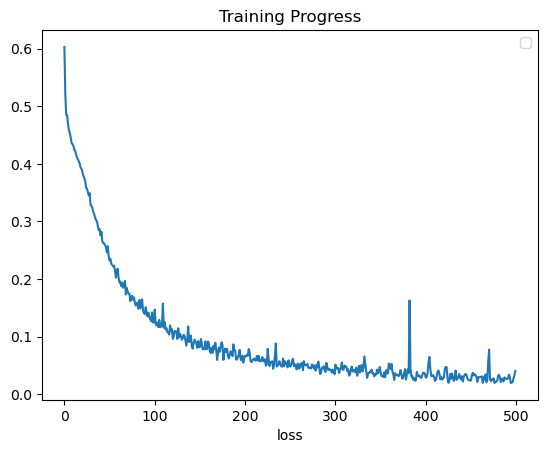

In [11]:

input_size = X_train.shape[1]  # Adjust based on your dataset features

model_class = ut.SimpleTransformerModel(input_size=input_size, num_classes=3, mode='classification')
optimizer_class = ut.optim.Adam(model_class.parameters(), lr=0.001)
criterion_class = ut.nn.CrossEntropyLoss()

print("Training Classifier:")
class_loader = ut.prepare_data('classification', X_train, y_train, X_test, y_test)
loss = ut.train_model(model_class, class_loader, optimizer_class, criterion_class, 500, 'classification')

ut.plt.plot(loss)
ut.plt.xlabel('Epoch')
ut.plt.xlabel('loss')
ut.plt.title('Training Progress')
ut.plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


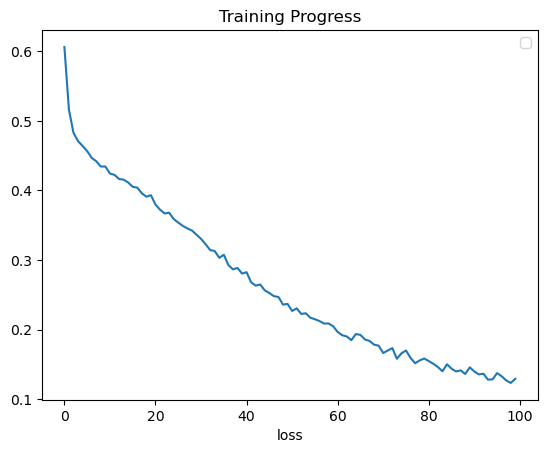

In [9]:
ut.plt.plot(loss)
ut.plt.xlabel('Epoch')
ut.plt.xlabel('loss')
ut.plt.title('Training Progress')
ut.plt.legend()
ut.plt.savefig('loss.png')

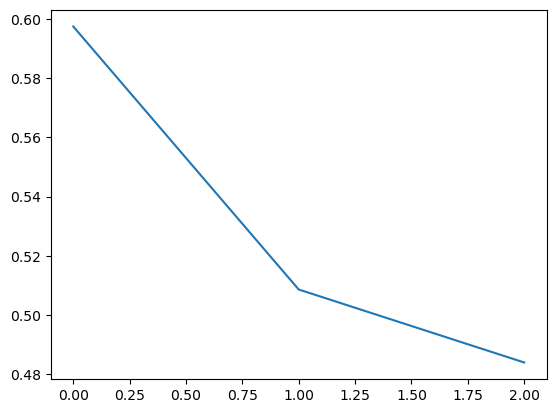